깃허브에 저장된 2023, 2024년 대구광역시립달성도서관 정보 불러오기

In [1]:
#깃허브와 코랩 연동
!git clone https://github.com/junebb24/weather.git

fatal: destination path 'weather' already exists and is not an empty directory.


In [2]:
import pandas as pd

df = pd.read_csv('/content/weather/daegu_lib23_24.csv', encoding = 'utf-8-sig')

In [3]:
df

,성별,대출일자,도서관명
0,여,2023-12-15,대구광역시립달성도서관
1,여,2023-12-15,대구광역시립달성도서관
2,여,2023-12-15,대구광역시립달성도서관
3,여,2023-12-29,대구광역시립달성도서관
4,여,2023-12-27,대구광역시립달성도서관
...,...,...,...
219317,남,2024-01-06,대구광역시립달성도서관
219318,남,2024-01-06,대구광역시립달성도서관
219319,남,2024-01-06,대구광역시립달성도서관
219320,남,2024-01-06,대구광역시립달성도서관


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219322 entries, 0 to 219321
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   성별      219322 non-null  object
 1   대출일자    219322 non-null  object
 2   도서관명    219322 non-null  object
dtypes: object(3)
memory usage: 5.0+ MB


In [5]:
# 1. 데이터 불러오기
df = pd.read_csv('/content/weather/daegu_lib23_24.csv', encoding='utf-8-sig')

# 2. 날짜 열을 datetime으로 변환
df['대출일자'] = pd.to_datetime(df['대출일자'], errors='coerce')

# 3. 날짜 + 성별로 그룹화하여 대출건수 집계
df_date_gender = df.groupby(['대출일자', '성별']).size().reset_index(name='대출건수')

# 4. 피벗 테이블로 변환 (날짜 행, 성별 열)
pivot_table = df_date_gender.pivot(index='대출일자', columns='성별', values='대출건수').fillna(0).astype(int)

# 5. 결과 확인
print(pivot_table.head())

성별            남    여
대출일자                
2023-09-01  199  263
2023-09-02  385  690
2023-09-03  390  633
2023-09-04   66  183
2023-09-05  117  333


In [6]:
pivot_table

성별,남,여
대출일자,,
2023-09-01,199,263
2023-09-02,385,690
2023-09-03,390,633
2023-09-04,66,183
2023-09-05,117,333
...,...,...
2024-08-27,165,357
2024-08-28,219,484
2024-08-29,82,267


In [7]:
pivot_table.mean()

,0
성별,
남,240.131902
여,432.634969


2023년 9월 ~ 2024년 8월 기상 데이터 추출

In [32]:
import requests
import json
import pandas as pd
import numpy as np

#API 설정
serviceKey = '5D%2FN3lUFb%2Fccmio7Os%2FnztF%2BRaCZ8vZEoDhRuNNdX4dq%2FZDkgu5B4zczYcPGRysQRLhQBfoM4ELhjR7P8oaV8A%3D%3D'
numOfRows = 500
startDt = 20230901
endDt = 20240831
stnId =143
URL=f"http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey={serviceKey}&pageNo=1&numOfRows={numOfRows}&dataType=JSON&dataCd=ASOS&dateCd=DAY&startDt={startDt}&endDt={endDt}&stnIds={stnId}"

# API 요청
response = requests.get(URL)
data = response.json()

# 데이터 추출
items = data['response']['body']['items']['item']
weather_data = [
    {
        'tm': item['tm'],
        'maxTa': item['maxTa'],
        'minTa': item['minTa'],
        'avgTa': item['avgTa'],
        'sumRn': item['sumRn'], #강수량
        'sumSsHr': item['sumSsHr'], #일조시간
        'ddMes': item['ddMes'] #일 최심적설
    }
    for item in items
]

# 데이터 프레임 생성
df_weather = pd.DataFrame(weather_data)

# 처음과 마지막 기상 정보 출력
print(df_weather.iloc[0]) # 처음
print(df_weather.iloc[-1]) # 마지막




tm         2023-09-01
maxTa            30.2
minTa            23.1
avgTa            25.8
sumRn                
sumSsHr           6.5
ddMes                
Name: 0, dtype: object
tm         2024-08-31
maxTa            33.3
minTa            24.3
avgTa            27.6
sumRn                
sumSsHr          11.5
ddMes                
Name: 365, dtype: object


In [33]:
df_weather

,tm,maxTa,minTa,avgTa,sumRn,sumSsHr,ddMes
0,2023-09-01,30.2,23.1,25.8,,6.5,
1,2023-09-02,28.9,22.5,24.9,1.1,2.4,
2,2023-09-03,31.8,22.6,26.6,,6.5,
3,2023-09-04,30.6,22.8,26.4,0.0,9.5,
4,2023-09-05,30.6,22.4,26.1,,10.4,
...,...,...,...,...,...,...,...
361,2024-08-27,30.9,23.7,26.2,10.8,0.6,
362,2024-08-28,29.9,24.1,26.6,,0.5,
363,2024-08-29,32.8,25.0,28.1,0.1,5.6,
364,2024-08-30,34.8,25.7,29.5,,10.2,


In [55]:
df_weather.isnull()

,tm,maxTa,minTa,avgTa,sumRn,sumSsHr,ddMes
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
361,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False


In [35]:
#isnull로 보이지 않았던 결측치 확인
print(repr(df_weather.loc[0, 'sumRn']))
print(repr(df_weather.loc[0, 'ddMes']))

''
''


In [36]:
#' '으로 처리된 데이터를 NAN 데이터로 변경
df_weather.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [37]:
#NAN 데이터를 0으로 대
df_weather['sumRn'] = df_weather['sumRn'].fillna(0)
df_weather['ddMes'] = df_weather['ddMes'].fillna(0)

In [38]:
df_weather

,tm,maxTa,minTa,avgTa,sumRn,sumSsHr,ddMes
0,2023-09-01,30.2,23.1,25.8,0,6.5,0
1,2023-09-02,28.9,22.5,24.9,1.1,2.4,0
2,2023-09-03,31.8,22.6,26.6,0,6.5,0
3,2023-09-04,30.6,22.8,26.4,0.0,9.5,0
4,2023-09-05,30.6,22.4,26.1,0,10.4,0
...,...,...,...,...,...,...,...
361,2024-08-27,30.9,23.7,26.2,10.8,0.6,0
362,2024-08-28,29.9,24.1,26.6,0,0.5,0
363,2024-08-29,32.8,25.0,28.1,0.1,5.6,0
364,2024-08-30,34.8,25.7,29.5,0,10.2,0


In [39]:
# CSV 파일로 저장
df_weather.to_csv('daegu_weather.csv', index = False, encoding = 'utf-8-sig')

In [40]:
# 날짜 열을 datetime으로 변환
df_weather['tm'] = pd.to_datetime(df_weather['tm'], errors='coerce')

combined_df = pd.merge(df, df_weather, left_on='대출일자', right_on='tm', how='left')
print(combined_df.head())

  성별       대출일자         도서관명         tm maxTa minTa avgTa sumRn sumSsHr ddMes
0  여 2023-12-15  대구광역시립달성도서관 2023-12-15  10.5   6.0   8.6  31.5     0.0     0
1  여 2023-12-15  대구광역시립달성도서관 2023-12-15  10.5   6.0   8.6  31.5     0.0     0
2  여 2023-12-15  대구광역시립달성도서관 2023-12-15  10.5   6.0   8.6  31.5     0.0     0
3  여 2023-12-29  대구광역시립달성도서관 2023-12-29   9.5  -2.9   3.1     0     8.5     0
4  여 2023-12-27  대구광역시립달성도서관 2023-12-27  11.3  -0.9   3.8     0     8.0     0


In [41]:
combined_df.shape

(219322, 10)

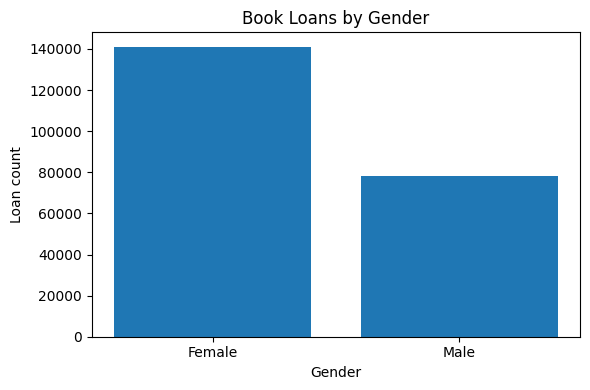

In [42]:
import matplotlib.pyplot as plt

# 성별에 따른 대출량 차이
gender_english = {'남': 'Male', '여': 'Female'}
gender_counts = combined_df['성별'].map(gender_english).value_counts()

plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Book Loans by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan count')
plt.tight_layout()
plt.show()


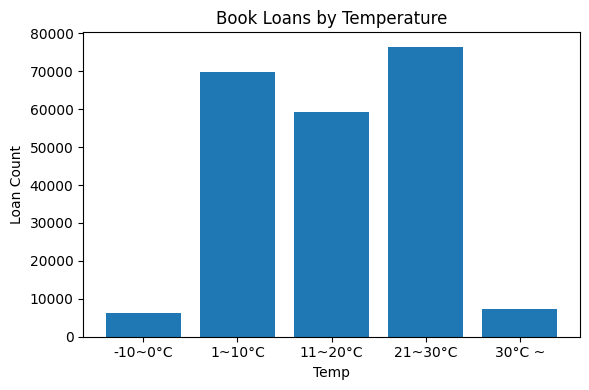

In [46]:
# 온도에 따른 대출량 차이
import matplotlib.pyplot as plt

# 'avgTa' 열을 숫자형으로 변환
combined_df['avgTa'] = pd.to_numeric(combined_df['avgTa'], errors='coerce')

combined_df['Temp'] = pd.cut(combined_df['avgTa'], bins=[-10, 0, 10, 20, 30, 40], labels=['-10~0°C', '1~10°C', '11~20°C', '21~30°C', '30°C ~'])
temp_counts = combined_df['Temp'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(temp_counts.index.astype(str), temp_counts.values)
plt.title('Book Loans by Temperature')
plt.xlabel('Temp')
plt.ylabel('Loan Count')
plt.tight_layout()
plt.show()

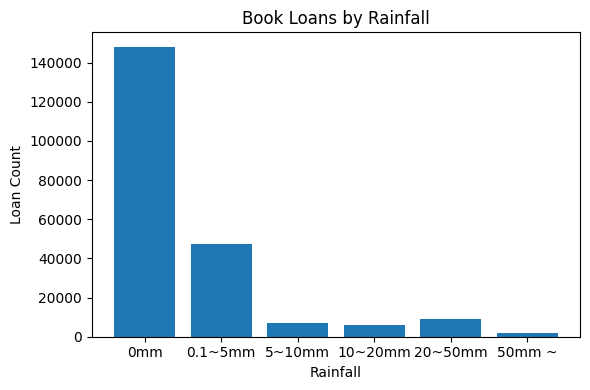

In [51]:
# 강수량에 따른 대출량 차이
combined_df['sumRn'] = pd.to_numeric(combined_df['sumRn'], errors='coerce')

combined_df['Rain'] = pd.cut(
    combined_df['sumRn'],
    bins=[-0.1, 0, 5, 10, 20, 50, 300],
    labels=['0mm', '0.1~5mm', '5~10mm', '10~20mm', '20~50mm', '50mm ~']
)

rain_counts = combined_df['Rain'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(rain_counts.index.astype(str), rain_counts.values)
plt.title('Book Loans by Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Loan Count')
plt.tight_layout()
plt.show()

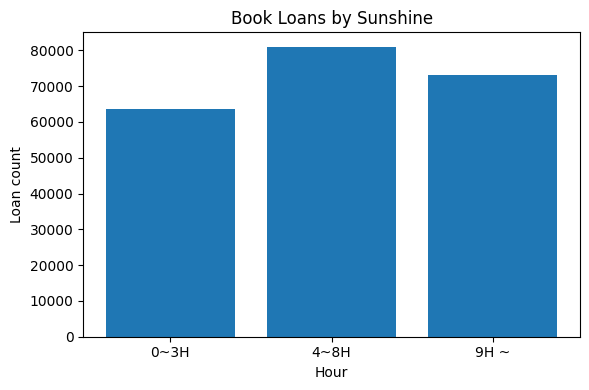

In [50]:
# 일조시간에 따른 대출량 차이
combined_df['sumSsHr'] = pd.to_numeric(combined_df['sumSsHr'], errors='coerce')

combined_df['Sun'] = pd.cut(combined_df['sumSsHr'], bins=[-0.1, 4, 9, 24], labels=['0~3H', '4~8H', '9H ~'])
sun_counts = combined_df['Sun'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(sun_counts.index.astype(str), sun_counts.values)
plt.title('Book Loans by Sunshine')
plt.xlabel('Hour')
plt.ylabel('Loan count')
plt.tight_layout()
plt.show()


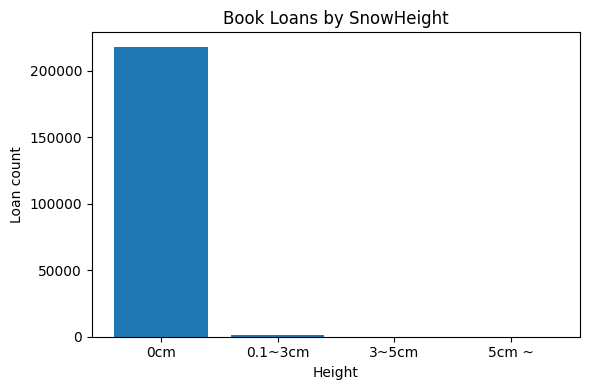

In [53]:
# 일 최심적설에 따른 대출량 차이
combined_df['ddMes'] = pd.to_numeric(combined_df['ddMes'], errors='coerce')

combined_df['Snow'] = pd.cut(combined_df['ddMes'], bins=[-0.1, 0, 3, 5, 100], labels=['0cm', '0.1~3cm','3~5cm', '5cm ~'])
sun_counts = combined_df['Snow'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(sun_counts.index.astype(str), sun_counts.values)
plt.title('Book Loans by SnowHeight')
plt.xlabel('Height')
plt.ylabel('Loan count')
plt.tight_layout()
plt.show()